# Training a PyTorch network to grade the fitness of a Chinese character drawing

In [1]:
import os
import random

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from load_bitmaps import loadXyCharSplits, displayBinary

# Load the data

In [2]:
test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = loadXyCharSplits("HanBitmap", "5E7E", test_size=test_size, random_state=seed)


2022-06-02 11:02:53.668331: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-02 11:02:53.668529: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-02 11:02:53.669854: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Define the structure of our network and compile it

In [3]:
model = Sequential([
    layers.Conv2D(16, 1, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 1, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 1, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="relu")
])

# Adam optimization parameter, using the value in the Tensorflow regression tutorial
adam_param = 0.001

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(adam_param))

In [4]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

In [5]:
# Only use the first 100 data points for quick training, this is where I run into GPU errors
model.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=10)
model.summary()

2022-06-02 11:02:54.876663: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-02 11:02:54.893575: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3195250000 Hz


Epoch 1/10
240/240 [==============================] - 28s 115ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 2/10
240/240 [==============================] - 29s 122ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 3/10
240/240 [==============================] - 28s 115ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 4/10
240/240 [==============================] - 28s 116ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 5/10
240/240 [==============================] - 28s 116ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 6/10
240/240 [==============================] - 28s 116ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/10
240/240 [==============================] - 28s 118ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/10
240/240 [==============================] - 28s 117ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/10
240/240 [==============================] - 28s 115ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 10/10
240/240 [==============================] - 29s 121ms/step - l

In [6]:
results = model.evaluate(X_test, y_test)

75/75 [==============================] - 1s 7ms/step - loss: 0.0019


In [7]:
predictions = model.predict(X_test)

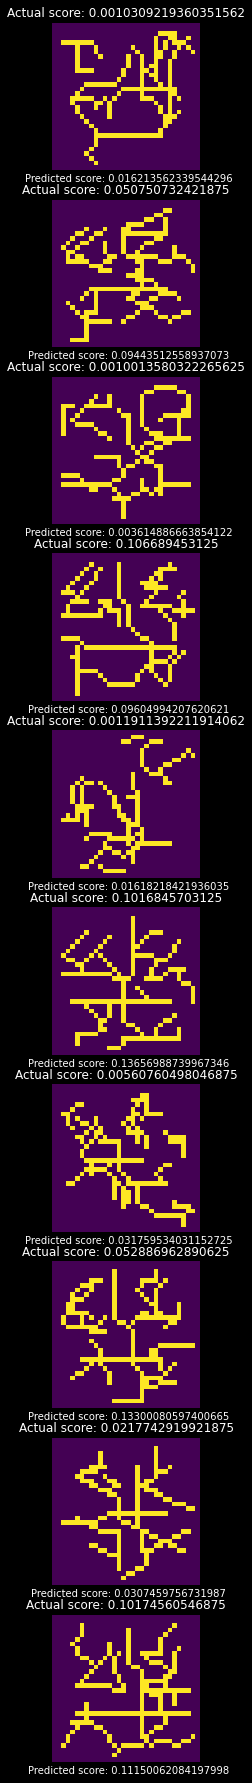

In [8]:
# Display the predicted and actual scores for the model

# make text display compatible with dark background, comment this out if using light theme
plt.style.use("dark_background")
ex = 10

for a in range(1):
    figs, axs = plt.subplots(ex, figsize=(32, 32))
    for i in range(ex):
        ax = axs[i]
        ax.axis("off")
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        ax.imshow(X_test[i+10*a, :, :, 0])
        ax.set_title(f"Actual score: {y_test[i+10*a]}")
        ax.text(16, 34, f"Predicted score: {predictions[i, 0]}", ha="center")
    

In [9]:
han_char = "5E7E"

model.save_weights(f"./Models/{han_char}_model")

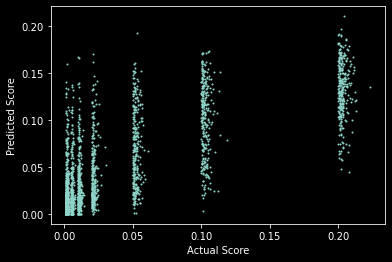

In [25]:
x, y = y_test, predictions[:, 0]

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.scatter(x, y, s=1)